<a href="https://colab.research.google.com/github/iamgsshetty/Clothing-app/blob/master/mini_proj_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader


In [6]:
!pip install ipython-autotime
%load_ext autotime

time: 319 µs (started: 2021-04-30 10:42:33 +00:00)


In [2]:
!mkdir images


In [32]:
# import shutil
# shutil.rmtree("/content/images/sniper")

time: 10.9 ms (started: 2021-04-30 12:07:29 +00:00)


In [33]:
from bing_image_downloader import downloader as dwn
dwn.download("german shepherd",limit=100,output_dir="images")



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://www.recreoviral.com/wp-content/uploads/2015/08/Fotografías-de-perros-con-sus-cachorros-20.jpg
[!] Issue getting: http://www.recreoviral.com/wp-content/uploads/2015/08/Fotografías-de-perros-con-sus-cachorros-20.jpg
[!] Error:: 'ascii' codec can't encode character '\xed' in position 40: ordinal not in range(128)
[%] Downloading Image #1 from https://i.pinimg.com/736x/59/19/b2/5919b26e5a69cb7b7783aa5f2e586d25--white-shepherd-white-german-shepherds.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/09/0086c45e7c47438e514092e4b936c1ef.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/GSD-12.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.sheprescue.org/images/dakota von dutch 3.JPG
[!] Issue getting: http://www.sh

In [34]:
dwn.download("pomeriann",limit=100,output_dir="images")
dwn.download("pitbull",limit=100,output_dir="images")
dwn.download("great dane",limit=100,output_dir="images")



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://www.mostwatchedtoday.com/wp-content/uploads/2014/05/pomeranian-haircut.jpg
[!] Issue getting: https://www.mostwatchedtoday.com/wp-content/uploads/2014/05/pomeranian-haircut.jpg
[!] Error:: <urlopen error [Errno -3] Temporary failure in name resolution>
[%] Downloading Image #1 from https://www.newslinq.com/wp-content/uploads/2016/08/cutest-puppies-in-the-world-6.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://2.bp.blogspot.com/-2Smv7xYWoTE/UN7yZrRUs5I/AAAAAAAAAMg/R820KqzoN90/s1600/385641_10151189511393254_353565466_n.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.ytimg.com/vi/YdWXnsgBpdM/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://i1.ytimg.com/vi/71Vv7VZpJms/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://s6004.pcdn.co/wp-content/uploads/2015/04/63930a9849258053aaa92dda0776ef47.jpg
[%] File 

In [35]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

time: 1.55 ms (started: 2021-04-30 12:14:05 +00:00)


In [36]:
target=[]
image=[]
flat_data=[]

DATADIR="/content/images"
categories=["german shepherd","great dane","pitbull","pomeriann"]

for c in categories:
  class_num=categories.index(c)
  path=os.path.join(DATADIR,c)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resize=resize(img_array,(300,300,3))
    flat_data.append(img_resize.flatten())
    image.append(img_resize)
    target.append(class_num)

flat_data=np.array(flat_data)
image=np.array(image)
target=np.array(target)



time: 44.1 s (started: 2021-04-30 12:15:33 +00:00)


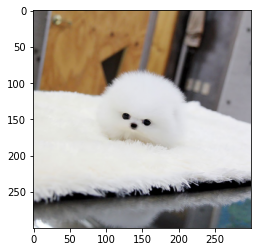

time: 238 ms (started: 2021-04-30 12:18:31 +00:00)


In [46]:
plt.imshow(image[360])

In [47]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(flat_data,target,test_size=0.3,random_state=111)

time: 195 ms (started: 2021-04-30 12:18:46 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
            #{'C':[1,10,100,1000],'gamma':[0.01,0.001],'kernel':['rbf']},
            #{'C':[1,10,100,1000],'gamma':[0.1,0.01],'kernel':['rbf'],'degree':[1,2,3]},
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

In [21]:
y_pred=clf.predict(x_test)


time: 706 ms (started: 2021-04-30 11:43:57 +00:00)


In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix

confusion_matrix(y_pred,y_test)

array([[13,  0,  3],
       [ 0, 13,  0],
       [ 1,  2, 13]])

time: 7.2 ms (started: 2021-04-30 11:44:07 +00:00)


In [23]:
accuracy_score(y_pred,y_test)

0.8666666666666667

time: 7.16 ms (started: 2021-04-30 11:44:52 +00:00)


In [24]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 75.2 ms (started: 2021-04-30 11:45:10 +00:00)


In [25]:
model=pickle.load(open('img_model.p','rb'))

time: 30.4 ms (started: 2021-04-30 11:46:06 +00:00)


enetr urlhttps://th.bing.com/th/id/OIP.CeBWdlSlY2c_hhfpB247jwHaEK?pid=ImgDet&rs=1
Predicted category is : ak47


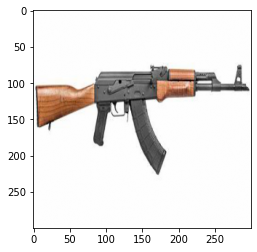

time: 5.33 s (started: 2021-04-30 11:53:55 +00:00)


In [28]:
fl_data=[]
url=input("enetr url")
img=imread(url)
img_resized=resize(img,(300,300,3))
fl_data.append(img_resized.flatten())
fl_data=np.array(fl_data)
plt.imshow(img_resized)
y_out=model.predict(fl_data)
y_out=categories[y_out[0]]
print(f'Predicted category is : {y_out}')
